In [1]:
### NOTE: this notebook is from https://machinelearningcoban.com/2017/04/09/smv/

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

# Compute distance between each pair of the two collections of inputs
from scipy.spatial.distance import cdist
np.random.seed(1)

In [3]:
means = [[1, 1], [5, 4]]
cov = [[.5, .3], [.3, .5]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X = np.vstack((X0, X1)).T
y = np.hstack((np.ones((1, N)), -1*np.ones((1, N))))

In [4]:
X0, X1, X, y

(array([[ 0.16612815, -0.22078058],
        [ 1.67334762,  0.99474268],
        [ 1.1804786 , -0.27514228],
        [ 0.13719891, -0.34423061],
        [ 0.8770798 ,  0.71936412],
        [ 0.72675544, -0.57619195],
        [ 1.32536319,  1.08246589],
        [ 0.6307574 , -0.06487491],
        [ 1.38665638,  0.83144997],
        [ 0.78899933,  1.15760404],
        [ 1.33409927,  2.05808611],
        [ 0.2708813 ,  0.58868662],
        [ 0.6464624 ,  0.21403494],
        [ 1.37363888,  0.78180633],
        [ 1.00171417,  1.33714042],
        [ 1.56290915,  1.31198019],
        [ 1.70188367,  1.16732868],
        [ 1.42853823,  1.42052843],
        [ 1.63252036,  1.78077786],
        [-0.28440604,  0.1849039 ]]),
 array([[5.40202038, 3.84063453],
        [4.93734326, 5.00774553],
        [5.16930206, 3.76643064],
        [4.21509546, 4.54341344],
        [4.72882805, 4.11918157],
        [4.9215468 , 3.69876444],
        [5.83306382, 4.61212009],
        [4.94660977, 4.31762285],
      

### SVM Primal problem:
$$\begin{array}{c}
\min _{w, b} \frac{1}{2}|| w||^{2} \\
y_{i}\left(w^{T} x_{i}+b\right) \geq 1, \forall i
\end{array}$$


### Lagrangian:
$$\mathcal{L}(w, b, \boldsymbol{\alpha})=\frac{1}{2}|| w||^{2}-\sum_{i} \alpha_{i}\left[y_{i}\left(w^{T} x_{i}+b\right)-1\right]$$
where $\alpha_i \geq 0$  is lagrangian multiplier


### Lagrange dual function:
$$\mathcal{g}(\alpha) = \sum_i \alpha_i - \frac{1}{2}\sum_{ij} \alpha_i \alpha_j y_i y_j x_i^\top x_j \\
\text{with} \sum_i \alpha_i y_i = 0 \text{,}\space \alpha_i \geq 0$$


Let:

$\mathbf{V}=\left[y_{1} x_{1}, y_{2} x_{2}, \ldots, y_{N} x_{N}\right]$

$\mathbf{1}=[1,1, \ldots, 1]^{T}$

$\mathbf{K} = \mathbf{V}^{T} \mathbf{V}$

$$=> g(\alpha)=-\frac{1}{2} \alpha^{T} \mathbf{K} \alpha+\mathbf{1}^{T} \alpha$$



In [5]:
#solving the problem
from cvxopt import matrix, solvers
# build V
# your code is here 
V = np.concatenate((X0.T, -X1.T), axis = 1)
##########

# your code is here
K = matrix(V.T.dot(V))
##########

p = matrix(-np.ones((2*N, 1))) # all-one vector 
# build A, b, G, h 
G = matrix(-np.eye(2*N)) # for all lambda_n >= 0
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) # the equality constrain is actually y^T lambda = 0
b = matrix(np.zeros((1, 1))) 


solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

alpha = np.array(sol['x'])

Support vectors are positive solutions ($\alpha > 0$) of the Lagrange dual function.

$w$ and $b$ can be calculated from support vector S:

$$w=\sum_{m \in \mathcal{S}} \lambda_{m} y_{m} x_{m}$$

$$b=\frac{1}{N_{\mathcal{S}}} \sum_{n \in \mathcal{S}}\left(y_{n}-\mathbf{w}^{T} \mathbf{x}_{n}\right)$$
where  $N_{\mathcal{S}}$ is the number of support vectors.


In [6]:
# Finding support vector
epsilon = 1e-5 # just a small number, greater than 1e-9
S = np.where(alpha > epsilon)[0]
alphaS = alpha[S]

In [7]:
alphaS

array([[3.30813550e-01],
       [1.43593234e-05],
       [3.30799231e-01]])

In [8]:
VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
VS, XS, yS

(array([[ 1.63252036, -3.80368646, -4.05933166],
        [ 1.78077786, -3.76490301, -2.17610983]]),
 array([[1.63252036, 3.80368646, 4.05933166],
        [1.78077786, 3.76490301, 2.17610983]]),
 array([[ 1., -1., -1.]]))

In [9]:
VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
# calculate w and b
### your code is here
w = VS.dot(alphaS)
b = np.sum(yS - w.T.dot(XS)) / len(alphaS)
###########

print('w = ', w.T)
print('b = ', b)

w =  [[-0.80281855 -0.13080407]]
b =  2.5444120388856324


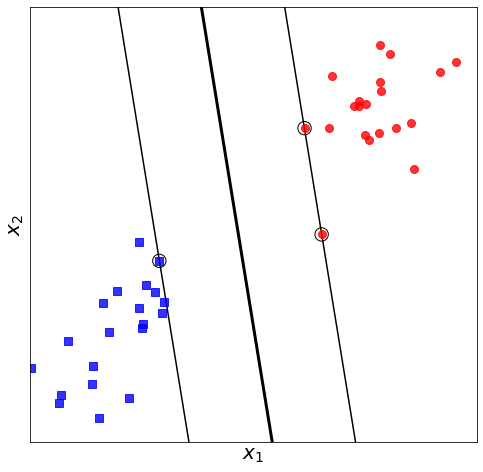

In [10]:
def plot(w, b, X0, X1, X, S):
    fig, ax = plt.subplots(figsize=(8,8))
    x1 = np.arange(-10, 10, 0.1)
    y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
    y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
    y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
    plt.plot(x1, y1, 'k', linewidth = 3)
    plt.plot(x1, y2, 'k')
    plt.plot(x1, y3, 'k')

    plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)

    plt.axis('equal')
    plt.ylim(np.min(X[1, :])*1.05, np.max(X[1, :])*1.05)
    plt.xlim(np.min(X[0, :])*1.05, np.max(X[0, :])*1.05)

    # hide tikcs 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    # add circles around support vectors 
    for m in S:
        circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
        ax.add_artist(circle)


    plt.xlabel('$x_1$', fontsize = 20)
    plt.ylabel('$x_2$', fontsize = 20)
    plt.show()

plot(w, b, X0, X1, X, S)